In [37]:
import pandas as pd
import numpy as np

In [3]:
from sklearn.ensemble import RandomForestClassifier

In [4]:
from sklearn.model_selection import GridSearchCV

In [6]:
from sklearn.tree import DecisionTreeClassifier

In [41]:
from sklearn.metrics import confusion_matrix

In [67]:
from sklearn.metrics import precision_score,recall_score

In [7]:
mush=pd.read_csv('https://stepik.org/media/attachments/course/4852/training_mush.csv')

In [8]:
mush.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
0,2,0,3,1,5,1,0,0,9,1,...,3,7,0,2,1,4,3,5,0,0
1,2,0,4,0,5,1,0,1,10,0,...,7,4,0,2,1,0,7,4,0,1
2,2,0,3,0,2,1,0,0,7,0,...,0,4,0,2,1,2,1,5,1,1
3,0,0,3,0,5,1,1,0,2,0,...,7,7,0,2,2,4,7,3,1,0
4,2,3,3,1,5,1,0,0,10,1,...,3,6,0,2,1,4,2,5,0,0


In [10]:
X=mush.drop('class', axis=1)

In [12]:
y=mush['class']

In [17]:
clf=RandomForestClassifier(random_state=0)

In [16]:
params={'n_estimators' : range(10,50,10),
        'max_depth' : range(1,12,2),
        'min_samples_leaf' : range(1,7),
        'min_samples_split' : range(2,9,2)}

In [23]:
clf_grid=GridSearchCV(clf, params,cv=3, n_jobs=-1)

In [24]:
clf_grid.fit(X,y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_estimators': range(10, 50, 10), 'max_depth': range(1, 12, 2), 'min_samples_leaf': range(1, 7), 'min_samples_split': range(2, 9, 2)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [25]:
clf_grid.best_params_

{'max_depth': 9,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 10}

In [26]:
best_clf=clf_grid.best_estimator_

In [28]:
feature_importances=best_clf.feature_importances_

In [29]:
features_importances_df=pd.DataFrame({'features' : list(X),
                                    'features_importances' : feature_importances})

In [31]:
features_importances_df.sort_values('features_importances', ascending=False)

,features,features_importances
4,odor,0.188376
8,gill-color,0.103861
10,stalk-root,0.103793
19,spore-print-color,0.083564
6,gill-spacing,0.080840
18,ring-type,0.070726
3,bruises,0.070109
7,gill-size,0.068461
12,stalk-surface-below-ring,0.048296
20,population,0.043783


In [32]:
X_test=pd.read_csv('https://stepik.org/media/attachments/course/4852/testing_mush.csv')

In [33]:
X_test.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0,3,8,1,3,1,0,0,4,0,...,2,7,7,0,2,1,4,2,3,3
1,5,3,4,1,5,1,0,0,10,1,...,2,6,6,0,2,1,4,3,5,0
2,3,3,4,0,8,1,0,1,0,1,...,2,7,6,0,2,1,0,7,4,4
3,3,2,2,0,7,1,0,1,0,1,...,1,6,7,0,2,1,0,7,4,0
4,3,2,2,0,8,1,0,1,0,1,...,1,6,6,0,2,1,0,7,4,4


In [35]:
prediction=best_clf.predict(X_test)

In [47]:
prediction.sum()


976

In [56]:
war=pd.read_csv('https://stepik.org/media/attachments/course/4852/invasion.csv')

In [57]:
war.head()

,class,g_reflection,i_reflection,speed,brightness,time_of_observance,volume
0,transport,2.190672,6.716633,62.168208,0.347465,158221,44.932446
1,transport,3.453276,8.995909,62.994707,0.590094,385972,41.568300
2,transport,2.432994,6.938691,62.245807,0.329288,446482,40.123467
3,fighter,6.083763,3.019459,18.474555,0.174738,210125,11.384865
4,fighter,12.876769,2.452950,195.805771,0.150446,23109,11.328806


In [55]:
pd.get_dummies('class')



,class
0,1


In [51]:
X=war.drop('class', axis=1)

In [58]:
y=war['class']

In [60]:
y=pd.get_dummies(y)

In [62]:
y.head()

,cruiser,fighter,transport
0,0,0,1
1,0,0,1
2,0,0,1
3,0,1,0
4,0,1,0


In [63]:
X_test=pd.read_csv('https://stepik.org/media/attachments/course/4852/operative_information.csv')

In [65]:
clf=DecisionTreeClassifier()

In [66]:
clf.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [69]:
params={
        'max_depth' : range(1,12),
        'min_samples_leaf' : range(1,10),
        'min_samples_split' : range(2,10)}

In [70]:
clf_grid=GridSearchCV(clf, params,cv=3, n_jobs=-1)

In [71]:
clf_grid.fit(X,y)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_depth': range(1, 12), 'min_samples_leaf': range(1, 10), 'min_samples_split': range(2, 10)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [72]:
best_clf_grid=clf_grid.best_estimator_

In [116]:
clf_grid.best_params_

{'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 2}

In [77]:
fight=best_clf_grid.predict(X_test)


In [133]:
fight

array([[0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       ...,
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [134]:
df = pd.DataFrame(data=fight, columns=list(y))

In [135]:
df.head()


,cruiser,fighter,transport
0,0.0,1.0,0.0
1,0.0,0.0,1.0
2,0.0,0.0,1.0
3,0.0,0.0,1.0
4,0.0,1.0,0.0


In [136]:
df.loc[:,'cruiser'].sum()

230.0

In [137]:
df.loc[:,'fighter'].sum()

675.0

In [98]:
df.loc[:,'transport'].sum()

595.0

In [138]:
feature_importances_fight=best_clf_grid.feature_importances_

In [139]:
feature_importances_fight_df=pd.DataFrame({'features' : list(X),
                                          'feature_importances_fight' : feature_importances_fight})

In [140]:
feature_importances_fight_df

,features,feature_importances_fight
0,g_reflection,0.000000
1,i_reflection,0.000000
2,speed,0.000000
3,brightness,0.657712
4,time_of_observance,0.000000
5,volume,0.342288


In [117]:
clf=RandomForestClassifier()

In [127]:
params={'n_estimators': range(1,20,2),
        'max_depth' : range(1,12),
        'min_samples_leaf' : range(2,10),
        'min_samples_split' : range(2,10)}

In [128]:
clf_random=GridSearchCV(clf, params,cv=5,n_jobs=-1)

In [129]:
clf_random.fit(X,y)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_estimators': range(1, 20, 2), 'max_depth': range(1, 12), 'min_samples_leaf': range(2, 10), 'min_samples_split': range(2, 10)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [130]:
clf_random.best_params_

{'max_depth': 2,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 7}

In [142]:
best=clf_random.best_estimator_

In [132]:
fight=clf_random.predict(X_test)

In [144]:
%matplotlib inline
import matplotlib.pyplot as plt

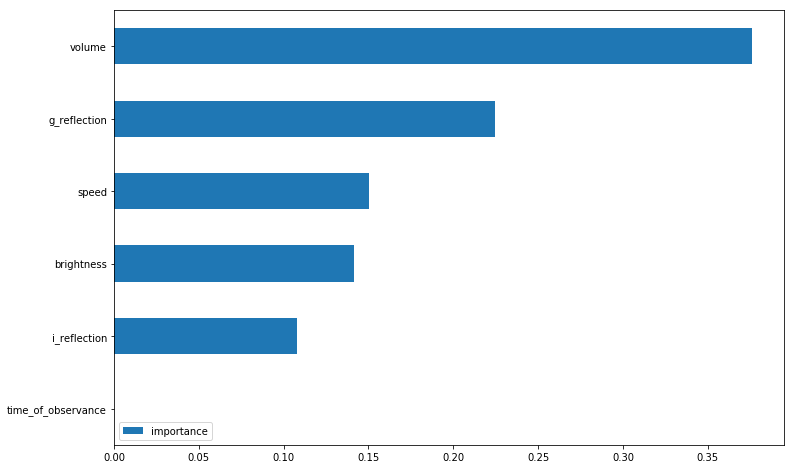

In [145]:
imp = pd.DataFrame(best.feature_importances_, index=X.columns, columns=['importance'])
imp.sort_values('importance').plot(kind='barh', figsize=(12, 8))

In [146]:
dangerous_place=pd.read_csv('https://stepik.org/media/attachments/course/4852/space_can_be_a_dangerous_place.csv')

In [147]:
dangerous_place.head()

,r,phi,peradventure_index,dustiness,black_hole_is_near,buggers_were_noticed,nearby_system_has_planemo,dangerous
0,169.1,138.0,22.3212,0.706285,0,1,1,1
1,11.1,148.0,1.4652,-0.410512,1,1,1,1
2,274.6,201.0,36.2472,0.756457,1,1,1,1
3,172.8,173.0,22.8096,0.035221,1,1,1,1
4,223.3,222.0,29.4756,0.197271,0,1,1,1
